In [117]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
"""
Two CSV files, 'netflix_fees.csv' and '2021_income.csv', are read into DataFrames 
named raw_netflix and raw_incomes, respectively.
raw_netflix.head() and raw_incomes.head() display the first few rows of each DataFrame.
"""


In [119]:
raw_netflix = pd.read_csv('netflix_fees.csv')

In [120]:
raw_incomes = pd.read_csv('2021_income.csv')

In [121]:
raw_netflix.head()

,country,code,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd
0,Argentina,ar,4760.0,3154.0,1606.0,3.74,6.30,9.26
1,Australia,au,6114.0,4050.0,2064.0,7.84,12.12,16.39
2,Austria,at,5640.0,3779.0,1861.0,9.03,14.67,20.32
3,Belgium,be,4990.0,3374.0,1616.0,10.16,15.24,20.32
4,Bolivia,bo,4991.0,3155.0,1836.0,7.99,10.99,13.99


In [122]:
raw_incomes.head()

,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Luxembourg,26321.0,31376.0,124590.0,647.599
1,United Arab Emirates,24292.0,27017.0,70089.0,9441.129
2,Norway,22684.0,25272.0,70005.0,5434.319
3,Switzerland,21490.0,25787.0,72376.0,8740.472
4,United States,19306.0,25332.0,65297.0,338289.857


In [ ]:
"""
The DataFrames raw_netflix and raw_incomes are merged based on the 'country' column, and the result is stored in a new DataFrame called final_data.
final_data.head() displays the first few rows of the merged DataFrame.
"""

In [134]:
final_data = raw_netflix.merge(raw_incomes, on='country' )

In [135]:
final_data.head()

,country,code,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Argentina,ar,4760.0,3154.0,1606.0,3.74,6.30,9.26,5319.0,6935.0,0.0,45510.318
1,Australia,au,6114.0,4050.0,2064.0,7.84,12.12,16.39,17076.0,21329.0,53381.0,26177.413
2,Austria,at,5640.0,3779.0,1861.0,9.03,14.67,20.32,18405.0,20718.0,60418.0,8939.617
3,Belgium,be,4990.0,3374.0,1616.0,10.16,15.24,20.32,16157.0,17917.0,56348.0,11655.930
4,Bolivia,bo,4991.0,3155.0,1836.0,7.99,10.99,13.99,3631.0,4787.0,9110.0,12224.110


In [ ]:
"""
percent_missing calculates the percentage of missing values in each column of the final_data 
DataFrame and stores the results.
The calculated percentages are then printed.
"""

In [136]:
percent_missing = final_data.isnull().sum() * 100 / len(df)

In [137]:
percent_missing

country             0.000000
code                0.000000
library_size        6.382979
tv_shows            6.382979
movies              6.382979
basic_usd           6.382979
standard_usd        6.382979
premium_usd         6.382979
medianIncome        6.382979
meanIncome          6.382979
gdpPerCapitaPPP    12.765957
pop2021             6.382979
dtype: float64

In [ ]:
"""
final_data.dropna() drops any rows containing missing values from the final_data DataFrame and updates final_data.
percent_missing is recalculated on the updated DataFrame, and the new percentages are printed.

"""

In [138]:
final_data = final_data.dropna()

In [139]:
percent_missing = final_data.isnull().sum() * 100 / len(df)

In [140]:
percent_missing

country            0.0
code               0.0
library_size       0.0
tv_shows           0.0
movies             0.0
basic_usd          0.0
standard_usd       0.0
premium_usd        0.0
medianIncome       0.0
meanIncome         0.0
gdpPerCapitaPPP    0.0
pop2021            0.0
dtype: float64

In [ ]:
"""
Two functions, cost_efficiency and is_affordable, are defined.

cost_efficiency calculates the cost efficiency by dividing the 'library_size' 
column by a specified plan column (e.g., 'basic_usd', 'standard_usd', 'premium_usd'), 
and stores the result in a new column specified by colname.

is_affordable calculates the affordability by dividing a specified plan column by the 
'medianIncome' column, and stores the result in a new column specified by colname.
"""

In [141]:
def cost_efficiency(plan, colname):
    final_data[colname] = final_data['library_size']/final_data[plan]
    return final_data

In [142]:
def is_affordable(plan, colname):
    final_data[colname] = final_data[plan]/final_data['medianIncome']
    return final_data

In [143]:
for i in ['basic_usd','standard_usd', 'premium_usd']:
    cost_colum_name = i + "_efficiency"
    income_column_name = i + "_affordable"
    final_data = cost_efficiency(i, cost_colum_name)
    final_data = is_affordable(i, income_column_name)

In [144]:
final_data.head()

,country,code,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021,basic_usd_efficiency,basic_usd_affordable,standard_usd_efficiency,standard_usd_affordable,premium_usd_efficiency,premium_usd_affordable
0,Argentina,ar,4760.0,3154.0,1606.0,3.74,6.30,9.26,5319.0,6935.0,0.0,45510.318,1272.727273,0.000703,755.555556,0.001184,514.038877,0.001741
1,Australia,au,6114.0,4050.0,2064.0,7.84,12.12,16.39,17076.0,21329.0,53381.0,26177.413,779.846939,0.000459,504.455446,0.000710,373.032337,0.000960
2,Austria,at,5640.0,3779.0,1861.0,9.03,14.67,20.32,18405.0,20718.0,60418.0,8939.617,624.584718,0.000491,384.458078,0.000797,277.559055,0.001104
3,Belgium,be,4990.0,3374.0,1616.0,10.16,15.24,20.32,16157.0,17917.0,56348.0,11655.930,491.141732,0.000629,327.427822,0.000943,245.570866,0.001258
4,Bolivia,bo,4991.0,3155.0,1836.0,7.99,10.99,13.99,3631.0,4787.0,9110.0,12224.110,624.655820,0.002200,454.140127,0.003027,356.754825,0.003853


In [145]:
final_data.columns

Index(['country', 'code', 'library_size', 'tv_shows', 'movies', 'basic_usd',
       'standard_usd', 'premium_usd', 'medianIncome', 'meanIncome',
       'gdpPerCapitaPPP', 'pop2021', 'basic_usd_efficiency',
       'basic_usd_affordable', 'standard_usd_efficiency',
       'standard_usd_affordable', 'premium_usd_efficiency',
       'premium_usd_affordable'],
      dtype='object')

In [ ]:
"""
top_libs is assigned the top 5 rows of final_data based 
on the 'library_size' column in descending order.

A bar plot is created using the 'country' column 
as the x-axis and the 'library_size' column as the y-axis, and it is displayed.

bottom_libs is assigned the bottom 5 rows of final_data based on the 'library_size' column in ascending order.
"""

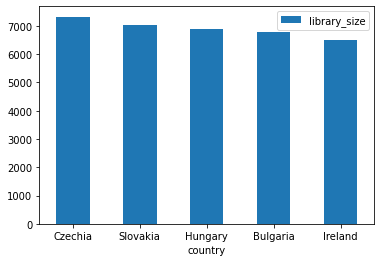

In [111]:
top_libs = final_data.sort_values('library_size', ascending=False).head(5)


top_libs.plot.bar(x='country', y='library_size', rot=0);

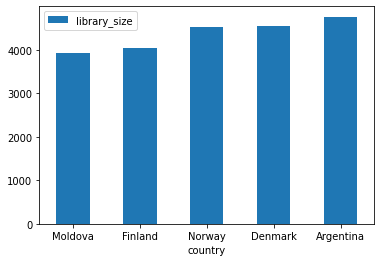

In [112]:
bottom_libs = final_data.sort_values('library_size', ascending=True).head(5)


bottom_libs.plot.bar(x='country', y='library_size', rot=0);

In [ ]:
"""
df_affordable is created by selecting specific columns 
('country', 'basic_usd_affordable', 'standard_usd_affordable', 'premium_usd_affordable') 
from the final_data DataFrame.

affordable_top is assigned the top 5 rows of df_affordable based on the 'basic_usd_affordable' 
column in ascending order.

affordable_bottom is assigned the bottom 5 rows of df_affordable based on the 'basic_usd_affordable' 
column in descending order.

A bar plot is created using the 'country' column as the x-axis and displayed.
"""

In [148]:
df_affordable = final_data[['country', 'basic_usd_affordable', 'standard_usd_affordable', 'premium_usd_affordable']]

In [151]:
affordable_top = df_affordable.sort_values('basic_usd_affordable', ascending=True).head(5)

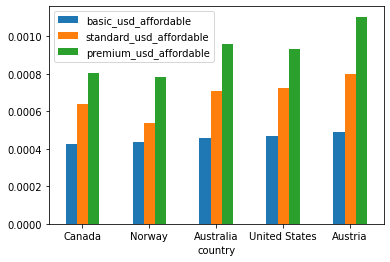

In [152]:
affordable_top.plot.bar(x='country', rot=0);

In [153]:
affordable_bottom = df_affordable.sort_values('basic_usd_affordable', ascending=False).head(5)

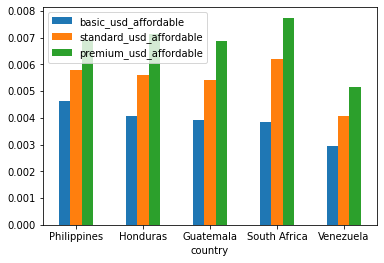

In [154]:
affordable_bottom.plot.bar(x='country', rot=0);

In [ ]:
"""
final_data.columns prints the column names of final_data.

correlation_df is created by selecting specific columns from final_data.

corr is assigned the correlation matrix of the selected columns in df.
The correlation matrix is styled with a background gradient using the 'RdBu_r' colormap and displayed.

"""

In [86]:
correlation_df = final_data[['library_size', 'tv_shows', 'movies', 'basic_usd',
       'standard_usd', 'premium_usd', 'medianIncome', 'meanIncome',
       'gdpPerCapitaPPP', 'pop2021']]

In [87]:
corr = correlation_df.corr()
corr.style.background_gradient(cmap='RdBu_r')

,library_size,tv_shows,movies,basic_usd,standard_usd,premium_usd,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
library_size,1.000000,0.981227,0.773511,0.078790,0.064472,0.008504,0.123858,0.120179,0.268548,0.012780
tv_shows,0.981227,1.000000,0.636758,0.118097,0.109346,0.063965,0.175017,0.160788,0.334577,-0.057020
movies,0.773511,0.636758,1.000000,-0.073089,-0.101576,-0.176204,-0.079958,-0.047905,-0.025832,0.238475
basic_usd,0.078790,0.118097,-0.073089,1.000000,0.888765,0.797372,0.596545,0.572056,0.584914,-0.296845
standard_usd,0.064472,0.109346,-0.101576,0.888765,1.000000,0.973161,0.709499,0.702577,0.726468,-0.187850
premium_usd,0.008504,0.063965,-0.176204,0.797372,0.973161,1.000000,0.762585,0.754722,0.785254,-0.159332
medianIncome,0.123858,0.175017,-0.079958,0.596545,0.709499,0.762585,1.000000,0.993059,0.869755,-0.000044
meanIncome,0.120179,0.160788,-0.047905,0.572056,0.702577,0.754722,0.993059,1.000000,0.862824,0.063664
gdpPerCapitaPPP,0.268548,0.334577,-0.025832,0.584914,0.726468,0.785254,0.869755,0.862824,1.000000,-0.020437
pop2021,0.012780,-0.057020,0.238475,-0.296845,-0.187850,-0.159332,-0.000044,0.063664,-0.020437,1.000000
